In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jose.mendonca\Documents\projeto_uc2\Scripts\python.exe -m pip install --upgrade pip' command.


In [33]:
import numpy as np
import polars as pl
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [40]:
inicial = (
    pl.scan_parquet("../Projeto/orders.parquet")
    .with_columns(
        pl.col("OrderDate")
        .str.strptime(pl.Date, "%Y-%m-%d", strict=False)
        .dt.to_string("%Y-%m")  # Formata como string YYYY-MM
        .alias("DATA_REF")
    )
)

resultado = inicial.collect()
display(resultado)

OrderID,OrderDate,CustomerID,ProductID,SellerID,Quantity,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,DATA_REF
str,str,str,str,str,i64,f64,f64,f64,f64,str,str,str
"""ORD0000001""","""2023-01-31""","""CUST001504""","""P00014""","""SELL01967""",3,0.0,0.0,0.09,319.86,"""Debit Card""","""Delivered""","""2023-01"""
"""ORD0000002""","""2023-12-30""","""CUST000178""","""P00040""","""SELL01298""",1,0.05,19.1,1.74,259.64,"""Amazon Pay""","""Delivered""","""2023-12"""
"""ORD0000003""","""2022-05-10""","""CUST047516""","""P00044""","""SELL00908""",3,0.1,7.57,5.91,108.06,"""Debit Card""","""Delivered""","""2022-05"""
"""ORD0000004""","""2023-07-18""","""CUST030059""","""P00041""","""SELL01164""",5,0.15,11.42,5.53,159.66,"""Cash on Delivery""","""Delivered""","""2023-07"""
"""ORD0000005""","""2023-02-04""","""CUST048677""","""P00029""","""SELL01411""",2,0.25,38.67,9.23,821.36,"""Credit Card""","""Cancelled""","""2023-02"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""ORD0000685""","""2022-10-17""","""CUST030151""","""P00009""","""SELL01296""",2,0.0,24.58,10.82,342.64,"""Credit Card""","""Shipped""","""2022-10"""
"""ORD0000686""","""2022-01-30""","""CUST029666""","""P00028""","""SELL00476""",1,0.05,42.91,0.25,281.53,"""Cash on Delivery""","""Delivered""","""2022-01"""
"""ORD0000687""","""2021-11-06""","""CUST041687""","""P00017""","""SELL00214""",1,0.3,6.62,14.37,153.42,"""Credit Card""","""Delivered""","""2021-11"""


=== DADOS AGRUPADOS ===
shape: (5, 2)
┌────────────┬─────────────┐
│ DATA_REF   ┆ VALOR_MEDIO │
│ ---        ┆ ---         │
│ date       ┆ f64         │
╞════════════╪═════════════╡
│ 2020-01-01 ┆ 801.396667  │
│ 2020-02-01 ┆ 878.4375    │
│ 2020-03-01 ┆ 1397.006667 │
│ 2020-04-01 ┆ 818.151818  │
│ 2020-05-01 ┆ 892.725455  │
└────────────┴─────────────┘

Tipo de DATA_REF: Date

=== DADOS PARA REGRESSÃO ===
shape: (5, 3)
┌────────────┬────────────────────┬─────────────┐
│ DATA_REF   ┆ MESES_DESDE_INICIO ┆ VALOR_MEDIO │
│ ---        ┆ ---                ┆ ---         │
│ date       ┆ i32                ┆ f64         │
╞════════════╪════════════════════╪═════════════╡
│ 2020-01-01 ┆ 0                  ┆ 801.396667  │
│ 2020-02-01 ┆ 1                  ┆ 878.4375    │
│ 2020-03-01 ┆ 2                  ┆ 1397.006667 │
│ 2020-04-01 ┆ 3                  ┆ 818.151818  │
│ 2020-05-01 ┆ 4                  ┆ 892.725455  │
└────────────┴────────────────────┴─────────────┘


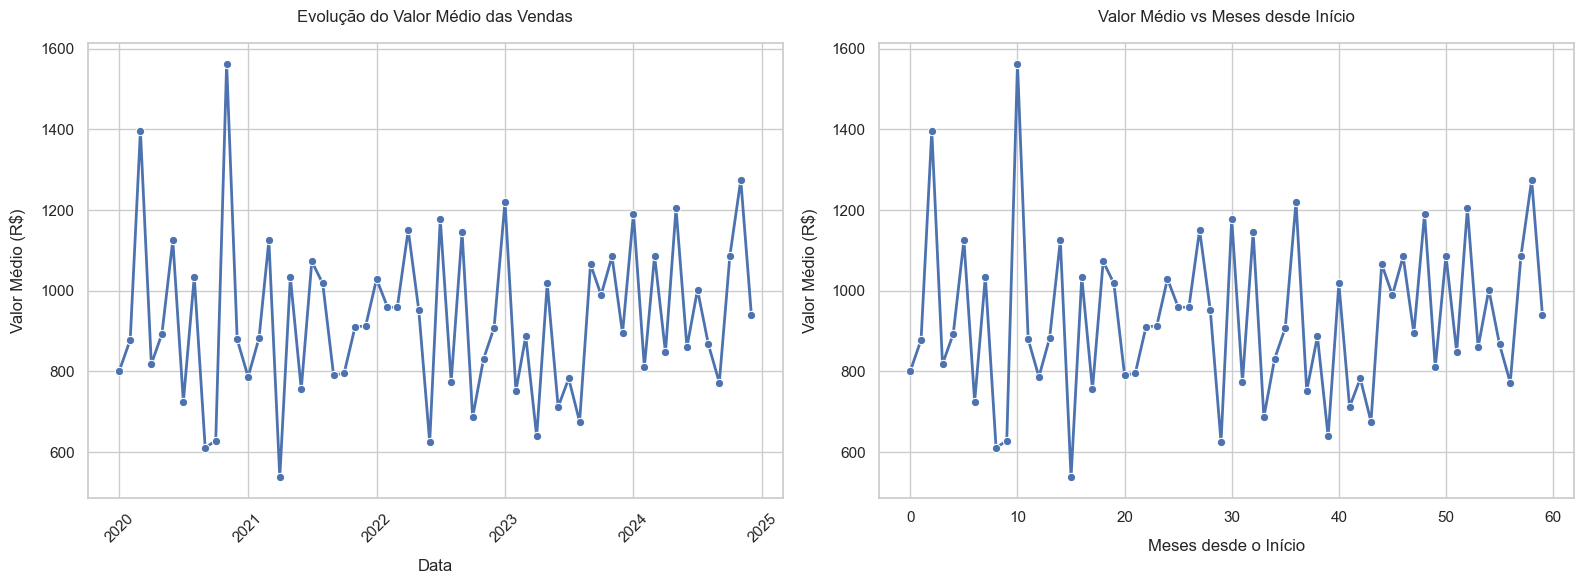


=== ANÁLISE DE TENDÊNCIA ===
Período analisado: 2020-01-01 a 2024-12-01
Total de meses: 60
Número de observações: 60
Valor médio inicial: R$ 801.40
Valor médio final: R$ 940.99

Correlação entre meses e valor médio: 0.071
⚠️  Correlação fraca - sem tendência clara


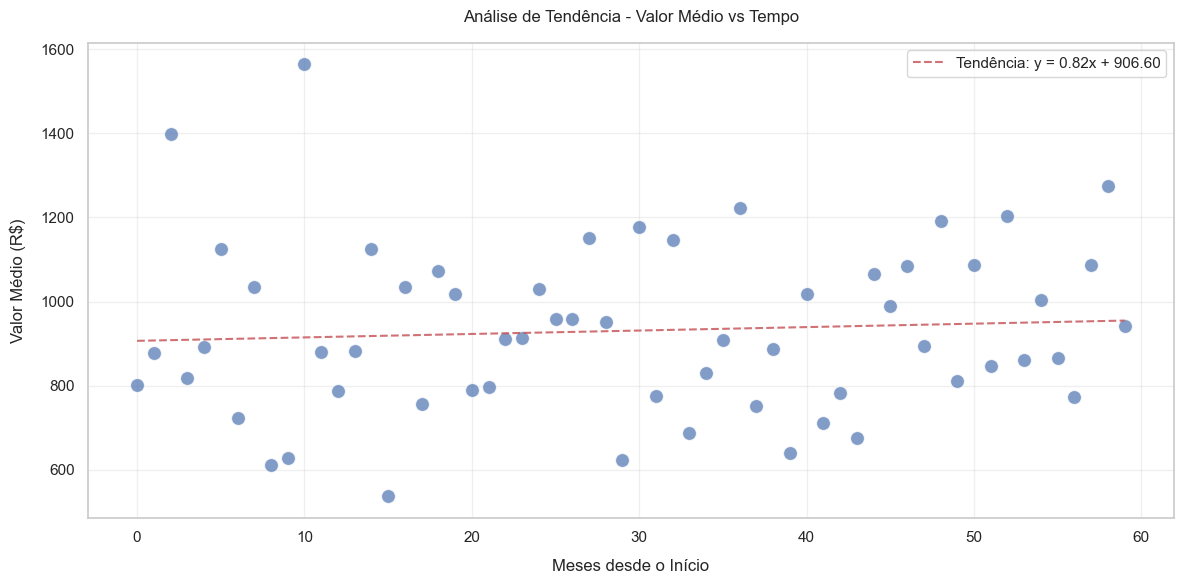

In [41]:
# 1. Carregar e preparar os dados com DATA_REF como Date
inicial = (
    pl.scan_parquet("../Projeto/orders.parquet")
    .with_columns(
        # Converter para Date e truncar para primeiro dia do mês
        pl.col("OrderDate")
        .str.strptime(pl.Date, "%Y-%m-%d", strict=False)
        .dt.truncate("1mo")
        .alias("DATA_REF")
    )
)

# 2. Agrupar por DATA_REF e calcular média
df_agrupado = (
    inicial.group_by("DATA_REF")
    .agg(pl.col("TotalAmount").mean().alias("VALOR_MEDIO"))
    .sort("DATA_REF")
    .collect()
)

print("=== DADOS AGRUPADOS ===")
print(df_agrupado.head())
print(f"\nTipo de DATA_REF: {df_agrupado['DATA_REF'].dtype}")

# 3. Garantir que DATA_REF é do tipo Date (já é, mas por segurança)
if df_agrupado["DATA_REF"].dtype != pl.Date:
    df_agrupado = df_agrupado.with_columns(
        pl.col("DATA_REF").str.strptime(pl.Date, "%Y-%m-%d", strict=False)
    )

# 4. Calcular meses desde o início (para análise de regressão/tendência)
df_reg = df_agrupado.with_columns(
    (pl.col("DATA_REF").dt.year() * 12 + pl.col("DATA_REF").dt.month() - 
     (pl.col("DATA_REF").min().dt.year() * 12 + pl.col("DATA_REF").min().dt.month()))
    .alias("MESES_DESDE_INICIO")
)

print("\n=== DADOS PARA REGRESSÃO ===")
print(df_reg.select(["DATA_REF", "MESES_DESDE_INICIO", "VALOR_MEDIO"]).head())

# 5. Plotar a evolução temporal completa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_theme(style="whitegrid")

# Gráfico 1: Evolução temporal normal
df_plot = df_reg.to_pandas()
sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MEDIO",
    ax=ax1,
    marker='o',
    linewidth=2
)
ax1.set_title("Evolução do Valor Médio das Vendas", pad=15)
ax1.set_xlabel("Data", labelpad=10)
ax1.set_ylabel("Valor Médio (R$)", labelpad=10)
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Evolução em relação aos meses desde início
sns.lineplot(
    data=df_plot,
    x="MESES_DESDE_INICIO",
    y="VALOR_MEDIO",
    ax=ax2,
    marker='o',
    linewidth=2
)
ax2.set_title("Valor Médio vs Meses desde Início", pad=15)
ax2.set_xlabel("Meses desde o Início", labelpad=10)
ax2.set_ylabel("Valor Médio (R$)", labelpad=10)

plt.tight_layout()
plt.show()

# 6. Análise de tendência (regressão linear simples)
print("\n=== ANÁLISE DE TENDÊNCIA ===")

# Calcular estatísticas básicas para análise de tendência
primeira_data = df_reg["DATA_REF"].min()
ultima_data = df_reg["DATA_REF"].max()
total_meses = df_reg["MESES_DESDE_INICIO"].max() + 1

print(f"Período analisado: {primeira_data} a {ultima_data}")
print(f"Total de meses: {total_meses}")
print(f"Número de observações: {len(df_reg)}")
print(f"Valor médio inicial: R$ {df_reg.filter(pl.col('MESES_DESDE_INICIO') == 0)['VALOR_MEDIO'][0]:.2f}")
print(f"Valor médio final: R$ {df_reg.filter(pl.col('MESES_DESDE_INICIO') == total_meses - 1)['VALOR_MEDIO'][0]:.2f}")

# 7. Preparar dados para regressão (opcional - se quiser fazer análise mais avançada)
# Converter para arrays numpy para análise estatística
import numpy as np

X = df_reg["MESES_DESDE_INICIO"].to_numpy()
y = df_reg["VALOR_MEDIO"].to_numpy()

# Calcular correlação
correlacao = np.corrcoef(X, y)[0, 1]
print(f"\nCorrelação entre meses e valor médio: {correlacao:.3f}")

if abs(correlacao) > 0.5:
    print("✅ Correlação forte detectada")
    if correlacao > 0:
        print("   Tendência: CRESCENTE")
    else:
        print("   Tendência: DECRESCENTE")
else:
    print("⚠️  Correlação fraca - sem tendência clara")

# 8. Gráfico com linha de tendência (opcional)
if len(df_reg) >= 3:  # Só plotar tendência se tiver dados suficientes
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plotar dados
    sns.scatterplot(
        data=df_plot,
        x="MESES_DESDE_INICIO",
        y="VALOR_MEDIO",
        ax=ax,
        s=100,
        alpha=0.7
    )
    
    # Adicionar linha de tendência
    z = np.polyfit(X, y, 1)
    p = np.poly1d(z)
    ax.plot(X, p(X), "r--", alpha=0.8, label=f"Tendência: y = {z[0]:.2f}x + {z[1]:.2f}")
    
    ax.set_title("Análise de Tendência - Valor Médio vs Tempo", pad=15)
    ax.set_xlabel("Meses desde o Início", labelpad=10)
    ax.set_ylabel("Valor Médio (R$)", labelpad=10)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Equação da reta: VALOR_MEDIO = 0.82 * MESES_DESDE_INICIO + 906.60
Coeficiente angular (R$/mês): 0.82
Intercepto (valor inicial): R$ 906.60

Métricas de avaliação:
Coeficiente de Determinação (R²): 0.0050
Erro Quadrático Médio (MSE): 39488.25


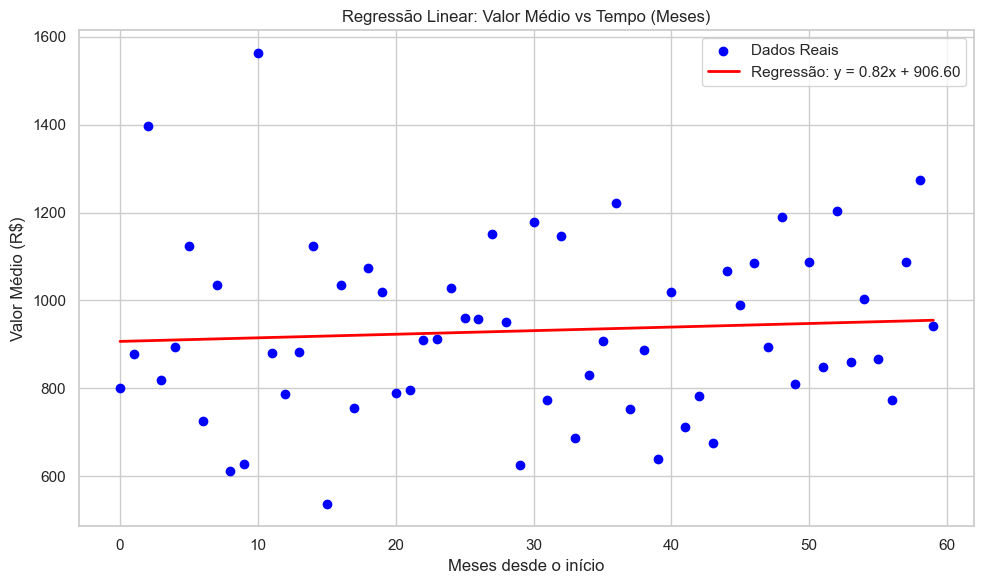

In [45]:
## 1. Preparar os dados para o modelo
# Converter para arrays numpy
X = df_reg["MESES_DESDE_INICIO"].to_numpy().reshape(-1, 1)  # Variável independente (meses)
y = df_reg["VALOR_MEDIO"].to_numpy()                        # Variável dependente (valor)

## 2. Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes do modelo
inclinacao = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Equação da reta: VALOR_MEDIO = {inclinacao:.2f} * MESES_DESDE_INICIO + {intercepto:.2f}")
print(f"Coeficiente angular (R$/mês): {inclinacao:.2f}")
print(f"Intercepto (valor inicial): R$ {intercepto:.2f}")

## 3. Fazer previsões
y_pred = modelo.predict(X)

## 4. Avaliar o modelo
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\nMétricas de avaliação:")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

## 5. Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar dados reais
plt.scatter(X, y, color='blue', label='Dados Reais')

# Plotar linha de regressão
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regressão: y = {inclinacao:.2f}x + {intercepto:.2f}')

# Configurações do gráfico
plt.title('Regressão Linear: Valor Médio vs Tempo (Meses)')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

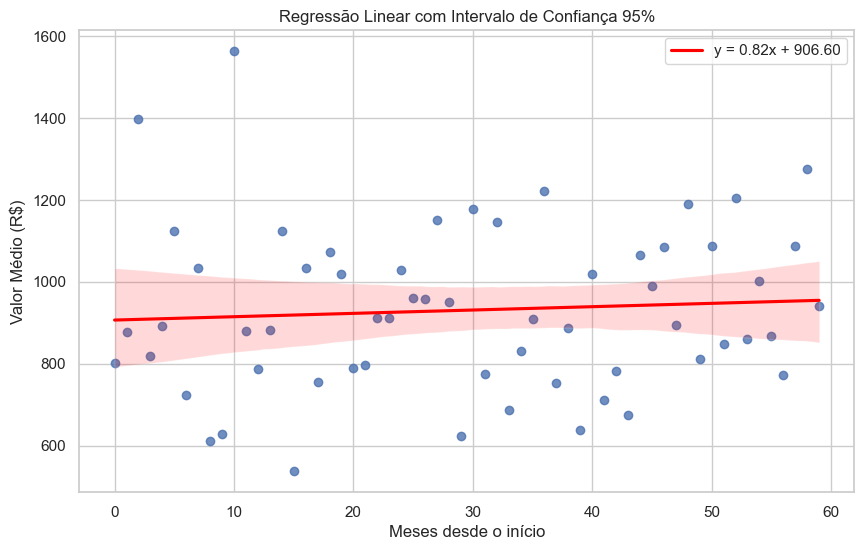

In [46]:
# Versão Alternativa com intervalo de confiança:
plt.figure(figsize=(10, 6))
sns.regplot(x=X.flatten(), y=y, ci=95, 
            line_kws={'color': 'red', 'label': f'y = {inclinacao:.2f}x + {intercepto:.2f}'})
plt.title('Regressão Linear com Intervalo de Confiança 95%')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.legend()
plt.grid(True)
plt.show()


#### **Como interpretamos tudo isso?**

Imagine que você quer criar um **mapa** que mostra como o valor do Bolsa Família muda com o passar do tempo. A regressão linear é como traçar uma **linha reta** que melhor representa essa relação:

- **Eixo X (horizontal)**: Tempo em meses (quanto tempo passou desde o início)
- **Eixo Y (vertical)**: Valor médio do benefício (em reais)

A linha reta vai nos ajudar a **prever** valores futuros com base no passado.

---

#### **A Fórmula: `y = a*x + b`**

A regressão linear tenta achar a melhor **linha reta** que passa perto de todos os pontos no gráfico. Essa linha tem uma fórmula simples:

`Valor do Benefício = (Inclinação) × (Tempo) + (Valor Inicial)`

Ou, em linguagem matemática:

`y = a*x + b`

Onde:
- **`a` (Inclinação)**: Diz **quanto o valor aumenta por mês** (em R$).
  - Exemplo: Se `a = 5`, significa que **a cada mês, o valor aumenta R$ 5,00**.
- **`b` (Valor Inicial)**: Diz **qual era o valor no primeiro mês** (quando o tempo era zero).

---

#### **Como o programa acha essa linha? (Método dos Mínimos Quadrados)**
O computador não irá "chutar" uma linha qualquer. Ele usa um método para achar a linha que **passa o mais perto possível** de todos os pontos no gráfico.

- **Erro**: A distância entre cada ponto real e a linha.
- **Objetivo**: Achar a linha que **minimiza a soma dos erros ao quadrado** (por isso o nome "mínimos quadrados").

---

#### **Como Saber Se a Linha é Boa? (R² e MSE)**
Nem sempre a linha vai passar **perfeitamente** por todos os pontos. Por isso, usamos duas medidas para ver se a previsão é confiável:

##### **R² (Coeficiente de Determinação)**
- **O que significa?**  
  - Se `R² = 1` → A linha explica **100%** dos dados (perfeito).  
  - Se `R² = 0.8` → A linha explica **80%** dos dados (bom).  
  - Se `R² = 0.2` → A linha explica **20%** dos dados (ruim).  

- **Exemplo**:  
  - Se `R² = 0.9`, significa que **90% da variação no valor do benefício** pode ser explicada pelo tempo. Os outros 10% podem ser por outros fatores (inflação, políticas públicas, etc.).

##### **MSE (Erro Quadrático Médio)**
- **O que significa?**  
  - Mede **o tamanho médio dos erros** entre os valores reais e a linha.  
  - Quanto **menor**, melhor.  

- **Exemplo**:  
  - Se `MSE = 100`, significa que, em média, a previsão erra por **±R$ 10** (porque √100 = 10).  

---

#### **O Gráfico**
Quando você vê o gráfico, repare em:

1. **Pontos Azuis**: São os **valores reais** (o que realmente aconteceu).  
2. **Linha Vermelha**: É a **previsão do modelo** (a tal "linha reta").  

Se os pontos estão **pertos da linha**, o modelo é bom. Se estão **muito espalhados**, a previsão pode não ser tão precisa.

---

#### **Exemplo Prático (Bolsa Família)**
Suponha que o modelo encontrou:
- **Inclinação (`a`)** = `5,32` (o valor aumenta **R$ 5,32 por mês**).  
- **Intercepto (`b`)** = `150,00` (no primeiro mês, o valor era **R$ 150,00**).  
- **R²** = `0,85` (o tempo explica **85%** da variação).  

Isso significa:
- A cada mês, o valor sobe **R$ 5,32**.  
- Se hoje são **10 meses** desde o início, o valor previsto é:  
  `150,00 + 5,32 × 10 = R$ 203,20`.  
- Como **R² = 0,85**, a previsão é **confiável**, mas outros fatores (como inflação) podem influenciar os 15% restantes.  

---

#### **Resumindo!**
 **Regressão Linear** → Acha uma **linha reta** que melhor representa a relação entre **tempo** e **valor do benefício**.  
 **Inclinação (`a`)** → Diz **quanto o valor aumenta por mês**.  
 **Intercepto (`b`)** → Diz **qual era o valor no começo**.  
 **R²** → Mostra **quão boa é a linha** (de 0% a 100%).  
 **MSE** → Mostra **o tamanho do erro médio**.  

---

##### **Próximos Passos**
Para melhorar a previsão, poderíamos considerar outros fatores, como:
- **Inflação**  
- **Mudanças na política pública**  
- **Número de beneficiários**  

Mas isso já seria uma **regressão múltipla** (mais complexa). Por enquanto, a regressão simples já nos dá uma ideia suficiente para as primeiras previsões.

---

![Descrição da imagem](https://pan-art-connections.com/wp-content/uploads/2024/03/PAN_WarnerBros-53.webp)